### Challenge1 : Employee Retention

We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.

As said above, the goal is to predict employee retention and understand its main drivers. Specifically, you should:


Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have
already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id. 

What are the main factors that drive employee churn? Do they make sense? Explain your
findings. If you could add to this data set just one variable that could help explain employee churn, what would that be?

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("employee_retention_data.csv")

In [3]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [4]:
#data['quit_year'] = pd.to_datetime(data['quit_date']).dt.year
#data['quit_month'] = pd.to_datetime(data['quit_date']).dt.month
#data['quit_day'] = pd.to_datetime(data['quit_date']).dt.day

#data['join_year'] = pd.to_datetime(data['join_date']).dt.year
#data['join_month'] = pd.to_datetime(data['join_date']).dt.month
#data['join_day'] = pd.to_datetime(data['join_date']).dt.day

In [5]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [6]:
data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])
data['num_days_worked'] = data['quit_date'] - data['join_date'] 

In [7]:
data = data.fillna(0)

In [8]:
data.apply(lambda x: sum(x.isnull()), axis = 0)

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date          0
num_days_worked    0
dtype: int64

In [9]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,num_days_worked
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585 days
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340 days
2,927315.0,4,marketing,14,101000.0,2014-10-13,1970-01-01,0 days
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389 days
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040 days


Here we need to fill in values for 'num_day_worked' for people who quit
For some reason pandas timeseries fills in default 1970-1-1 date for NaN values for quit date

In [10]:
data.company_id.value_counts()

1     8486
2     4222
3     2749
4     2062
5     1755
6     1291
7     1224
8     1047
9      961
10     865
12      24
11      16
Name: company_id, dtype: int64

In [11]:
data["num_days_worked"] = data["num_days_worked"].dt.days

In [12]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,num_days_worked
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340
2,927315.0,4,marketing,14,101000.0,2014-10-13,1970-01-01,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040


In [13]:
data["churn"] = [0 if x == 0 else 1 for x in data["num_days_worked"]]

In [14]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,num_days_worked,churn
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,1970-01-01,0,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040,1


In [15]:
current_date = pd.to_datetime('13DEC2015', format='%d%b%Y')
num_days = current_date - data.join_date
num_days_still_working = pd.Series(num_days.dt.days)
#print(num_days_still_working)

In [16]:
for i in range(len(data)):
    if data["churn"][i] == 0:
        #print(i, num_days_still_working[i])
        data["num_days_worked"][i] = num_days_still_working[i]



C:\Users\Kalyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [17]:
data.head(10)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,num_days_worked,churn
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,1970-01-01,426,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040,1
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578,1
6,88600.0,4,customer_service,21,107000.0,2013-10-21,1970-01-01,783,0
7,716309.0,2,customer_service,4,30000.0,2014-03-05,1970-01-01,648,0
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23,1047,1
9,504159.0,1,sales,7,104000.0,2012-06-12,1970-01-01,1279,0


In [18]:
# Remove outliers
data = data[data.seniority<50]

In [19]:
data.to_csv("employee_retention_data_new.csv")

In [20]:
import seaborn as sns

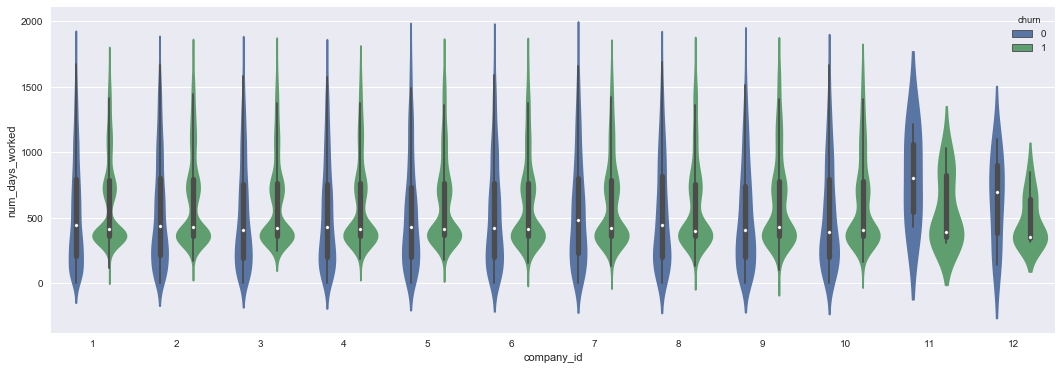

In [21]:
plt.figure(figsize=(18,6))
sns.violinplot(x="company_id", y="num_days_worked", hue="churn", data=data);

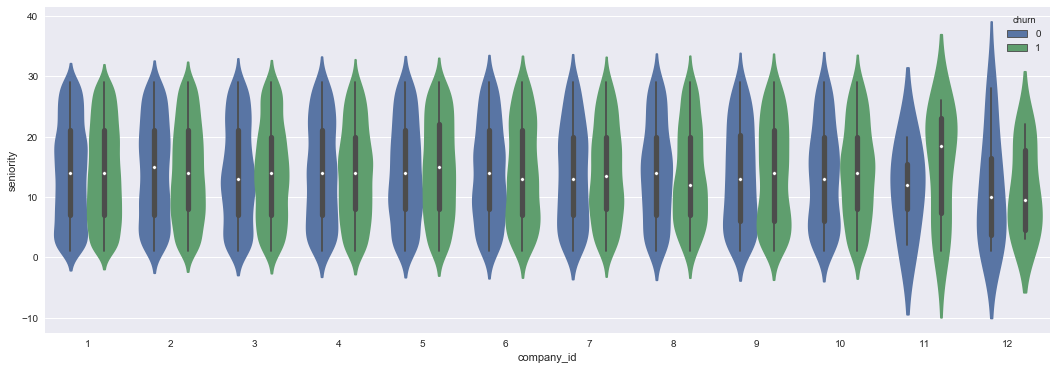

In [22]:
plt.figure(figsize=(18,6))
sns.violinplot(x="company_id", y="seniority", hue="churn", data=data)

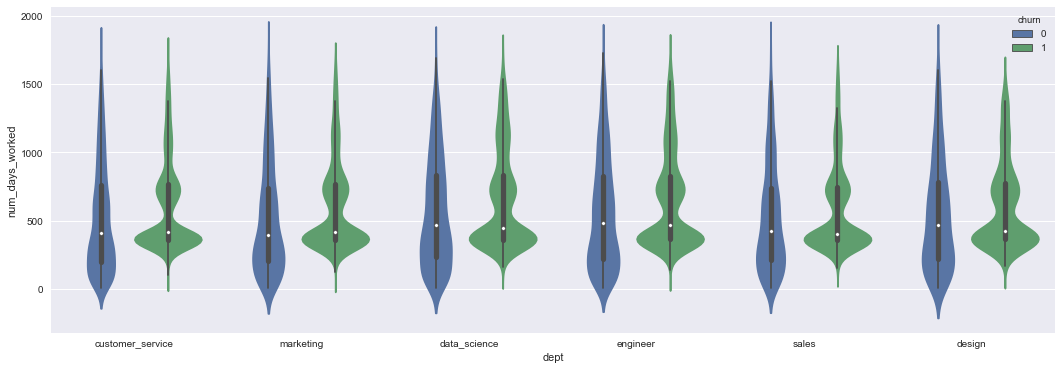

In [23]:
plt.figure(figsize=(18,6))
sns.violinplot(x="dept", y="num_days_worked", hue="churn", data=data);

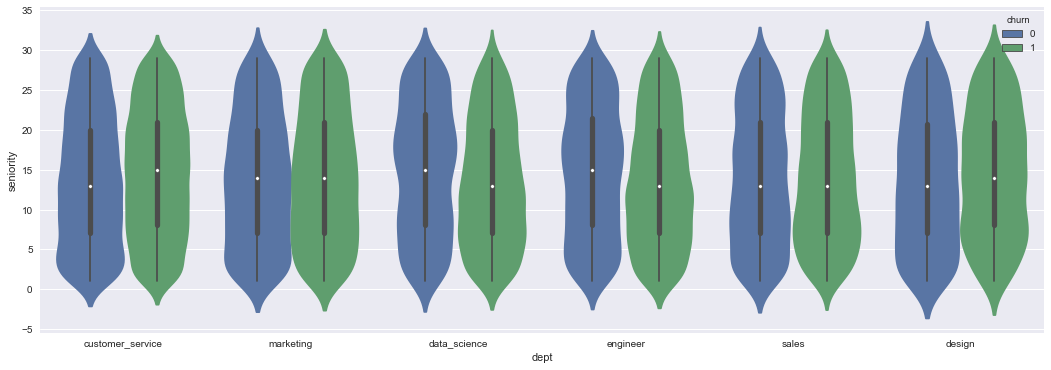

In [24]:
plt.figure(figsize=(18,6))
sns.violinplot(x="dept", y="seniority", hue="churn", data=data)

In [25]:
#Lets create a new feature of salary normalized by seniority 

data["salary_by_seniority"] = data["salary"]/data["seniority"]

In [26]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,num_days_worked,churn,salary_by_seniority
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585,1,3178.571429
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340,1,9150.000000
2,927315.0,4,marketing,14,101000.0,2014-10-13,1970-01-01,426,0,7214.285714
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389,1,5750.000000
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040,1,12000.000000


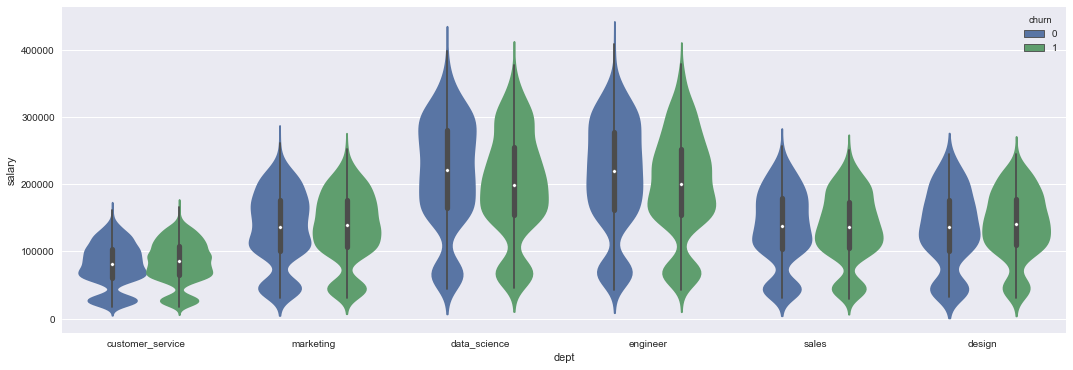

In [27]:
plt.figure(figsize=(18,6))
sns.violinplot(x="dept", y="salary", hue="churn", data=data)

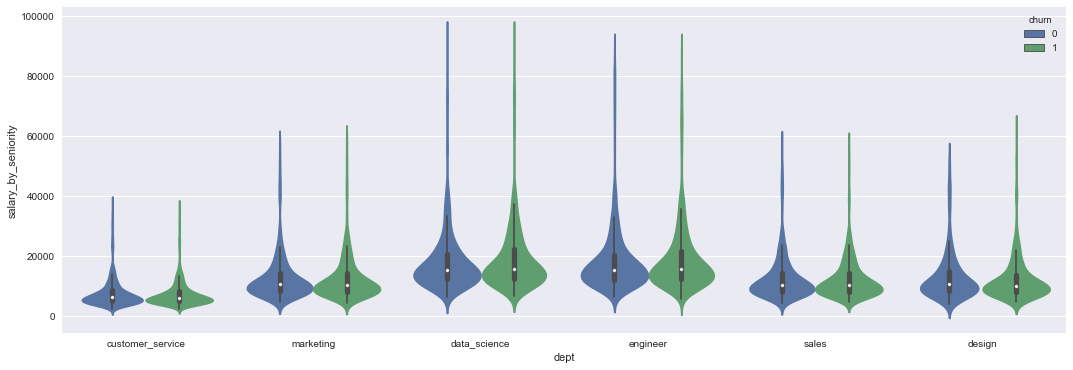

In [28]:
plt.figure(figsize=(18,6))
sns.violinplot(x="dept", y="salary_by_seniority", hue="churn", data=data)

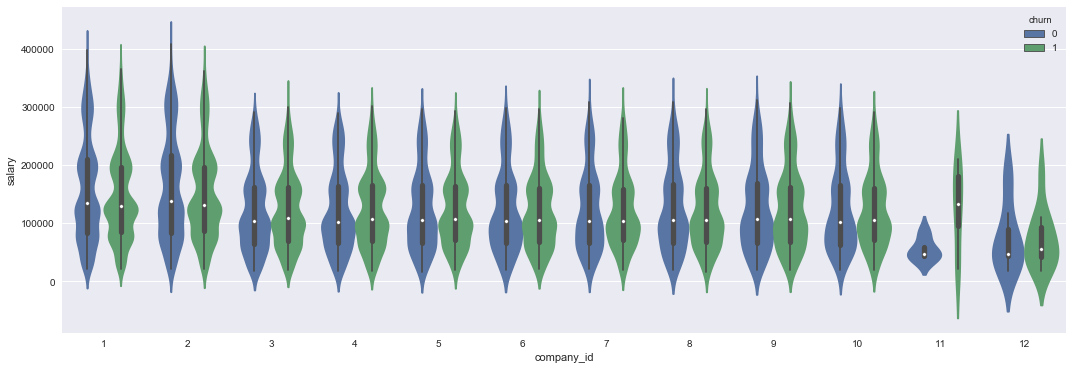

In [29]:
plt.figure(figsize=(18,6))
sns.violinplot(x="company_id", y="salary", hue="churn", data=data)

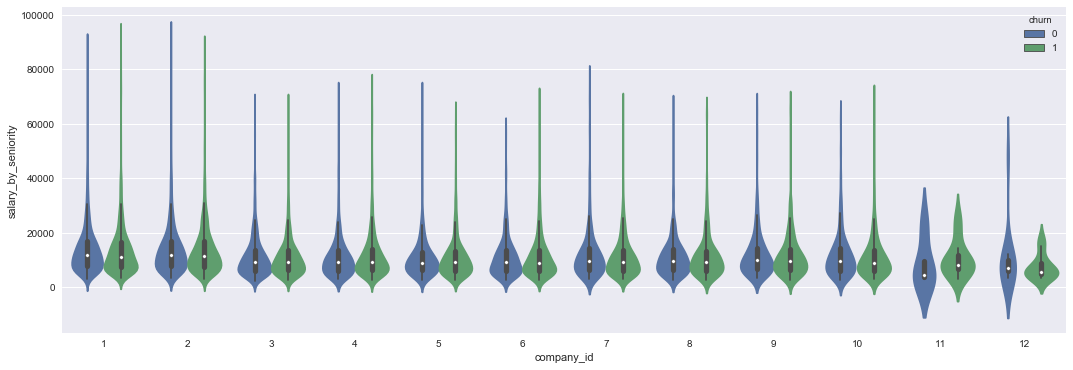

In [30]:
plt.figure(figsize=(18,6))
sns.violinplot(x="company_id", y="salary_by_seniority", hue="churn", data=data)

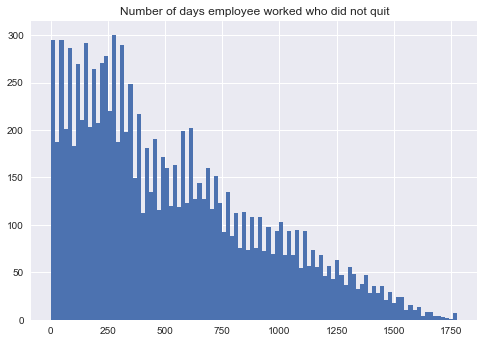

In [201]:
data[data["churn"] == 0].num_days_worked.hist(bins=100)
plt.title("Number of days employee worked who did not quit")

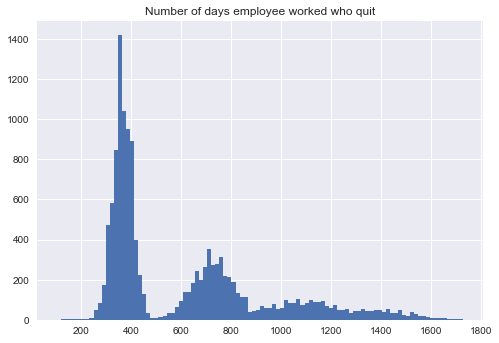

In [202]:
data[data["churn"] == 1].num_days_worked.hist(bins=100)
plt.title("Number of days employee worked who quit")

In [203]:
data.head(1)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,num_days_worked,churn,salary_by_seniority
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585,1,3178.571429


In [164]:
# Lets build a model to predict if an employee quit or not

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import preprocessing

df = pd.get_dummies(data=data, columns=['dept'])

features_to_use = ["company_id", "seniority", "salary", "num_days_worked",\
                   "salary_by_seniority","dept_customer_service", "dept_data_science", \
                   "dept_design", "dept_engineer", "dept_engineer", "dept_sales" ]

X = df[features_to_use].values
y = df["churn"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

#clf = LogisticRegression()
clf = DecisionTreeClassifier()
#clf = RandomForestClassifier(n_estimators=100)

cv_ssplit = ShuffleSplit(n_splits=10, test_size=0.3, random_state=100)
cv_score = cross_val_score(clf, X_train, y_train, cv=cv_ssplit, scoring = 'f1')
    
print("Average cross-validation F1 score: %0.4f +/- %0.4f\n" % (cv_score.mean(), cv_score.std()*2))
        
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print("Test set F1 score : " + str(f1_score(y_test, pred)))
print("Test set accuracy : " + str(accuracy_score(y_test, pred)))
print("\n Classification Report: \n" + classification_report(y_test, pred))


Average cross-validation F1 score: 0.8734 +/- 0.0284

Test set F1 score : 0.901776900296
Test set accuracy : 0.892577597841

 Classification Report: 
             precision    recall  f1-score   support

          0       0.88      0.89      0.88      3341
          1       0.91      0.90      0.90      4069

avg / total       0.89      0.89      0.89      7410



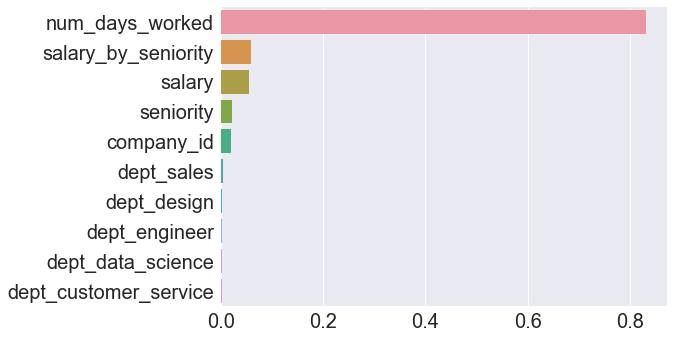

In [165]:
feat_imp_df = pd.DataFrame({"feature":features_to_use, "importance":clf.feature_importances_})
feat_imp_df.sort_values("importance", inplace=True, ascending=False)
sns.barplot(x=feat_imp_df.importance.values, y = feat_imp_df.feature.values, orient='h')
plt.tick_params(labelsize=20)

In [52]:
data.to_csv("employee_retention_data_new.csv")

In [197]:
# Lets build another model to predict number of days employee worked before quitting

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
from sklearn import preprocessing

df = pd.get_dummies(data=data, columns=['dept'])

df_reg = df[df["churn"] == 1]

features_to_use = ["company_id", "seniority", "salary", "salary_by_seniority","dept_customer_service", \
                   "dept_data_science", "dept_design", "dept_engineer", "dept_engineer", "dept_sales" ]

X = df_reg[features_to_use].values
y = df_reg["num_days_worked"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

#reg = LinearRegression()
#reg = DecisionTreeRegressor()
reg = RandomForestRegressor(n_estimators=200, max_depth=15)

cv_ssplit = ShuffleSplit(n_splits=10, test_size=0.3, random_state=100)
cv_score = cross_val_score(reg, X_train, y_train, cv=cv_ssplit, scoring = 'r2')
    
print("Average CV accuracy score: %0.4f +/- %0.4f\n" % (cv_score.mean(), cv_score.std()*2))
        
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print("Test set R2 : " + str(r2_score(y_test, pred)))
print("Test set MAE (days): " + str(mean_absolute_error(y_test, pred)))


Average CV accuracy score: -0.0585 +/- 0.0202

Test set R2 : -0.0332582143257
Test set MAE (days): 276.653752181


This model is not very predictive.

### Conclusions

1. There seems to be pattern in when most employees will quit from a company. Most people will quit just around 1 year of service and then the next wave of quitting happens around two years of service and so on for fourth and fifth years. 


2. This pattern is similar across different companies and departments. 


3. One piece of information that will help predictions is the annual bonus data. It is likely that epmployees are quitting after getting their bounus, but without having actual data we cannot assume this. 

### Create table with the following columns:  'days', 'company_id' and 'employee_headcount' 

This is a useful table if one want to perform further an

In [94]:
date_range_emp =  pd.date_range(start='2011/1/24', end='2015/12/13', freq='D')

In [95]:
emp = pd.DataFrame(date_range_emp, columns=["day"])

In [96]:
emp.head()

,day
0,2011-01-24
1,2011-01-25
2,2011-01-26
3,2011-01-27
4,2011-01-28


In [97]:
comp_id  = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12])

In [98]:
comp_id_df = pd.DataFrame(comp_id, columns=["company_id"])

In [99]:
comp_id_df["key"] = 1 

In [100]:
comp_id_df.head()

,company_id,key
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [101]:
emp["key"] = 1

In [102]:
emp.head()

,day,key
0,2011-01-24,1
1,2011-01-25,1
2,2011-01-26,1
3,2011-01-27,1
4,2011-01-28,1


In [103]:
emp = emp.merge(comp_id_df, on="key")

In [104]:
del emp["key"]

In [105]:
emp.head()

,day,company_id
0,2011-01-24,1
1,2011-01-24,2
2,2011-01-24,3
3,2011-01-24,4
4,2011-01-24,5


In [106]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,num_days_worked,churn,salary_by_seniority
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585,1,3178.571429
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340,1,9150.000000
2,927315.0,4,marketing,14,101000.0,2014-10-13,1970-01-01,426,0,7214.285714
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389,1,5750.000000
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040,1,12000.000000


In [118]:
# function to calculate headcount each day starting on 2011-01-24. 
# We can run this on emp table row wise to add headcount each day
def emp_headcount(emp_row):
    emp_join_count = len(data[(data.join_date==emp_row["day"]) & (data.company_id==emp_row["company_id"])])
    emp_quit_count = len(data[((data.quit_date==emp_row["day"])&(data.churn == 1)) & (data.company_id==emp_row["company_id"])])
    
    headcount = emp_join_count - emp_quit_count
    
    return headcount

In [119]:
val = emp.apply(emp_headcount, axis=1)

In [124]:
emp["headcount"] = val

In [129]:
# do cumulative sum of headcount for each company
emp["headcount"] = emp.groupby("company_id")["headcount"].cumsum()

In [131]:
emp.head(30)

,day,company_id,headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5
5,2011-01-24,6,3
6,2011-01-24,7,1
7,2011-01-24,8,6
8,2011-01-24,9,3
9,2011-01-24,10,0
